In [24]:
# Classifying Cosmic Particles with Machine Learning 
#** project Goal:** The objective of this project is to build and evaluate four different 
#machine learning models to classify high-energy particles from the Magic Gamma Telescope dataset.

#**Workflow:**
#1. Load and inspect the data.
#2. Prepare the data by separating features and splitting for training and testing.
#3. Apply feature scaling to standardize the data.
#4. Train and evaluate four models: Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors.
#5. Compare the accuracy of the models to identify the best performer.#

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Fixed: lowercase 'tree' instead of 'Tree'
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

In [26]:
# Load the dataset from the CSV file
df = pd.read_csv("MAGIC Gamma Telescope.csv")

# Display the shape (rows, columns) and the first 5 rows of the data
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (19020, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [27]:
# Separate the features (X) from the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

print("Data has been successfully scaled.")

Data has been successfully scaled.


In [29]:
# Create a dictionary of the models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Loop through each model to train, evaluate, and print its score
for name, model in models.items():
    print(f"--- Training and evaluating {name} ---")
    
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on the scaled test data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%\n")

--- Training and evaluating Logistic Regression ---
Accuracy: 79.31%

--- Training and evaluating Decision Tree ---
Accuracy: 81.26%

--- Training and evaluating Random Forest ---
Accuracy: 88.41%

--- Training and evaluating K-Nearest Neighbors ---
Accuracy: 83.44%



In [30]:
#The results clearly show that the Random Forest Classifier is the
#best-performing model for this dataset, achieving the highest accuracy of 88.41%.

In [31]:
# First, I get to make  predictions on my best model (Random Forest) again
# assuming  'forest_model' is my trained Random Forest from the loop
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train_scaled,y_train)

y_pred_forest = forest_model.predict(X_test_scaled)
# Now, create and print the report
report = classification_report(y_test, y_pred_forest)

print("--- Classification Report for Random Forest Model ---")
print(report)

--- Classification Report for Random Forest Model ---
              precision    recall  f1-score   support

           g       0.89      0.94      0.91      2460
           h       0.88      0.78      0.83      1344

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



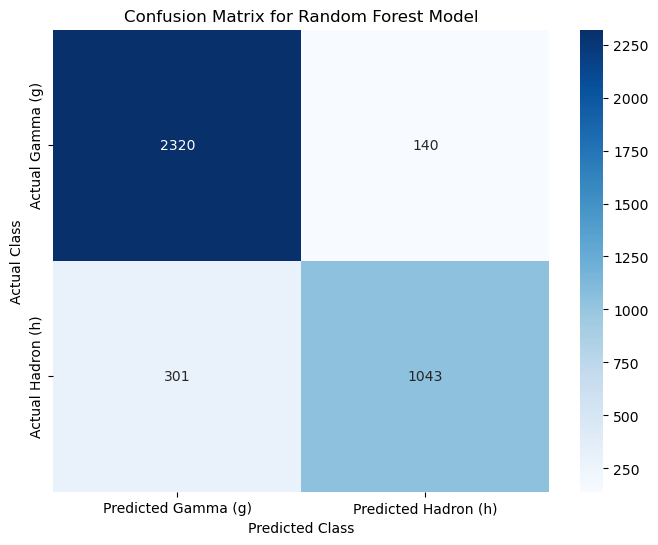

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# We assume 'y_test' and 'y_pred_forest' still exist from the previous cell
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)

# Create a heatmap to visualize it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Gamma (g)', 'Predicted Hadron (h)'], 
            yticklabels=['Actual Gamma (g)', 'Actual Hadron (h)'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()